In [59]:
! conda info --help 

usage: conda-script.py info [-h] [--json] [-v] [-q] [-a] [--base] [-e] [-s]
                            [--unsafe-channels]

Display information about current conda install.

Options:

options:
  -h, --help         Show this help message and exit.
  -a, --all          Show all information.
  --base             Display base environment path.
  -e, --envs         List all known conda environments.
  -s, --system       List environment variables.
  --unsafe-channels  Display list of channels with tokens exposed.

Output, Prompt, and Flow Control Options:
  --json             Report all output as json. Suitable for using conda
                     programmatically.
  -v, --verbose      Use once for info, twice for debug, three times for
                     trace.
  -q, --quiet        Do not display progress bar.


In [2]:
! conda activate transformer

In [3]:
!python --version

Python 3.9.18


In [ ]:

! pip install tensorflow===2.10.0
! pip install torch
! pip install keras===2.10.0
! pip install transformers
! pip install datasets
! pip install sentencepiece
! pip install evaluate
! pip install nltk
! pip install rouge_score


### 
Question Answering : major task of NLP 
 It is based on Context of the body to search for answers.

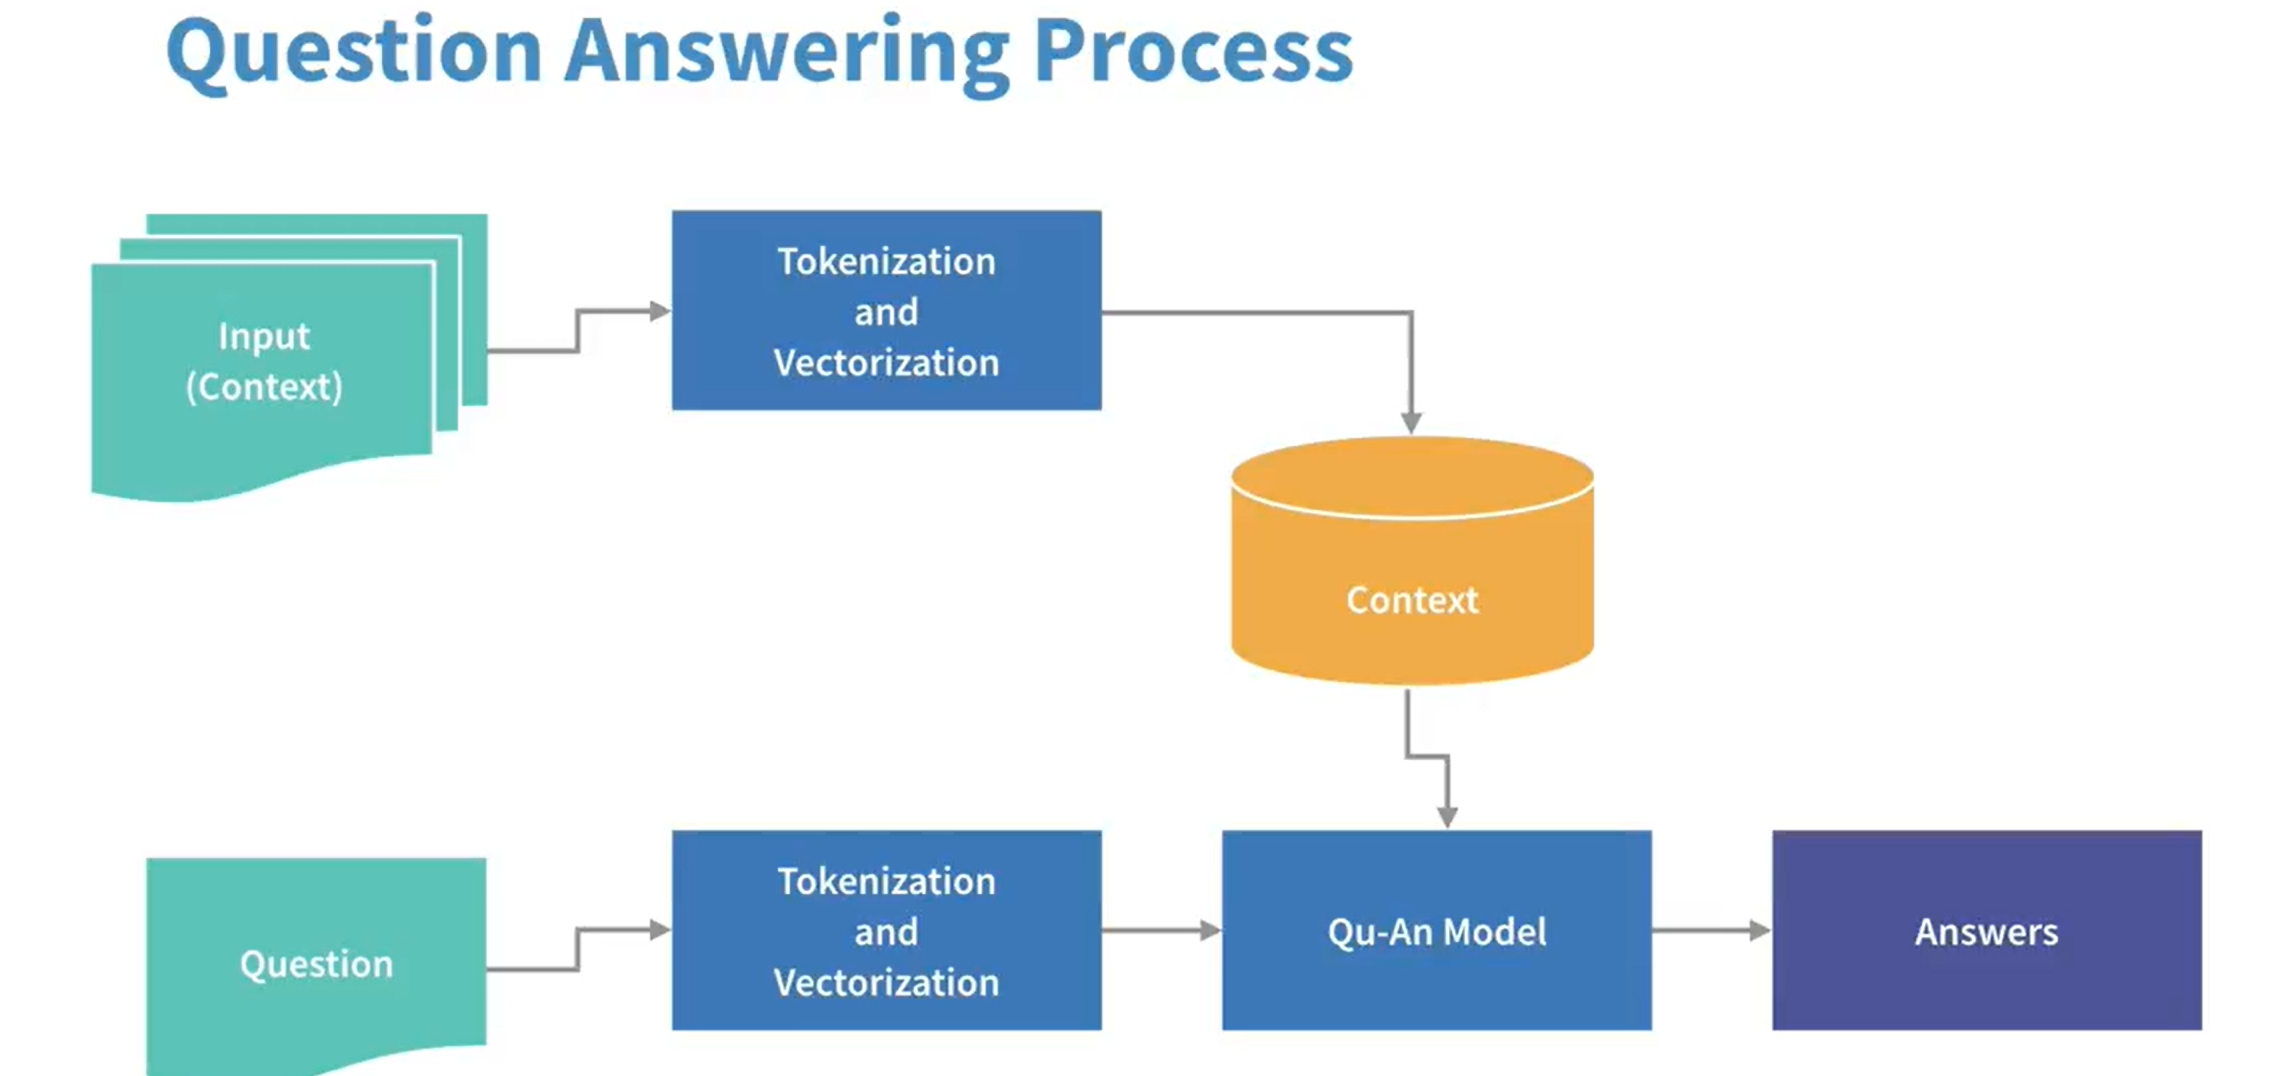

Hugging face a pre processing mechanism that helps with NLP.

types of Qna system: 
QDQA

> Closed domain Qu-AN (CDQA): trained on ltd. set of text , specific to a domain.




In [4]:
# Part 1: 
import transformers
# ignoring messages - warnings

transformers.logging.set_verbosity_error()


C:\Users\bkapoor\.conda\envs\transformer\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from transformers import pipeline

In [6]:
context = """
Earth is the third planet from the Sun and the only astronomical object known to harbor life. This is enabled by Earth being a water world, the only one in the Solar System sustaining liquid surface water. Almost all of Earth's water is contained in its global ocean, covering 70.8% of Earth's crust. The remaining 29.2% of Earth's crust is land, most of which is located in the form of continental landmasses within one hemisphere, Earth's land hemisphere. Most of Earth's land is somewhat humid and covered by vegetation, while large sheets of ice at Earth's polar deserts retain more water than Earth's groundwater, lakes, rivers and atmospheric water combined. Earth's crust consists of slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. Earth has a liquid outer core that generates a magnetosphere capable of deflecting most of the destructive solar winds and cosmic radiation.

Earth has a dynamic atmosphere, which sustains Earth's surface conditions and protects it from most meteoroids and UV-light at entry. It has a composition of primarily nitrogen and oxygen. Water vapor is widely present in the atmosphere, forming clouds that cover most of the planet. The water vapor acts as a greenhouse gas and, together with other greenhouse gases in the atmosphere, particularly carbon dioxide (CO2), creates the conditions for both liquid surface water and water vapor to persist via the capturing of energy from the Sun's light. This process maintains the current average surface temperature of 14.76 °C, at which water is liquid under atmospheric pressure. Differences in the amount of captured energy between geographic regions (as with the equatorial region receiving more sunlight than the polar regions) drive atmospheric and ocean currents, producing a global climate system with different climate regions, and a range of weather phenomena such as precipitation, allowing components such as nitrogen to cycle.

"""


In [7]:
quan_pipeline = pipeline("question-answering", model = "deepset/minilm-uncased-squad2")
answer = quan_pipeline(question = "How much of the earth is in land?", context = context)
                       

In [8]:
print(answer)

{'score': 0.9345442056655884, 'start': 316, 'end': 321, 'answer': '29.2%'}


In [9]:
print("\nAnother question : ")
print(quan_pipeline(question ="How are the mountain ranges created?", context = context))



Another question : 
{'score': 0.38379767537117004, 'start': 692, 'end': 721, 'answer': 'slowly moving tectonic plates'}


## The SQuAD Metric
 A special one: Stanford Q n A Dataset .

 
 uses a scoring function to measure the accuracy of answers 
 
 for each question, a ground truth or correct answer is needed for evaluation.

 

In [10]:
from evaluate import load
squad_metric = load("squad_v2")

correct_answer = "Paris"

predicted_answers = ["Paris", "London", "Paris is one of the best cities in the world"]

for i, predicted_answer in enumerate(predicted_answers):
    predictions = [{'prediction_text': predicted_answer, 'id': str(i), 'no_answer_probability': 0.}]
    references = [{'answers': {'answer_start': [1], 'text': [correct_answer]}, 'id': str(i)}]

    # Compute results for each individual prediction
    results = squad_metric.compute(predictions=predictions, references=references)
    print(f"F1 is {results.get('f1')} for answer: {predicted_answer}")

# For cumulative results, compute outside of the loop
cum_predictions = [{'prediction_text': ans, 'id': str(i), 'no_answer_probability': 0.} for i, ans in enumerate(predicted_answers)]
cum_references = [{'answers': {'answer_start': [1], 'text': [correct_answer]}, 'id': str(i)} for i in range(len(predicted_answers))]

cum_results = squad_metric.compute(predictions=cum_predictions, references=cum_references)
print("\nCumulative results:\n", cum_results)


F1 is 100.0 for answer: Paris
F1 is 0.0 for answer: London
F1 is 22.22222222222222 for answer: Paris is one of the best cities in the world

Cumulative results:
 {'exact': 33.333333333333336, 'f1': 40.74074074074074, 'total': 3, 'HasAns_exact': 33.333333333333336, 'HasAns_f1': 40.74074074074074, 'HasAns_total': 3, 'best_exact': 33.333333333333336, 'best_exact_thresh': 0.0, 'best_f1': 40.74074074074074, 'best_f1_thresh': 0.0}


## Types Of summarizations

> Extractive Summarization: sentence is verbatim, extract subset from input text, represnting the context.
> Abstractive Summarizaiton: create a human like summary 

## BART Model 

Bidirectional Auto regressive transformers from facebook.


In [11]:
verbose_text =""" 

Earth is the third planet from the Sun and the only astronomical object 
known to harbor life. 

While large volumes of water can be found 

throughout the Solar System, only Earth sustains liquid surface water. 
About 71% of Earth's surface is made up of the ocean, dwarfing 

Earth's polar ice, lakes, and rivers. 

The remaining 29% of Earth's 

surface is land, consisting of continents and islands. 

Earth's surface layer is formed of several slowly moving tectonic plates, 
interacting to produce mountain ranges, volcanoes, and earthquakes. 
Earth's liquid outer core generates the magnetic field that shapes Earth's 
magnetosphere, deflecting destructive solar winds. 

""" 

verbose_text = verbose_text.replace("\n","")
print(verbose_text)

 Earth is the third planet from the Sun and the only astronomical object known to harbor life. While large volumes of water can be found throughout the Solar System, only Earth sustains liquid surface water. About 71% of Earth's surface is made up of the ocean, dwarfing Earth's polar ice, lakes, and rivers. The remaining 29% of Earth's surface is land, consisting of continents and islands. Earth's surface layer is formed of several slowly moving tectonic plates, interacting to produce mountain ranges, volcanoes, and earthquakes. Earth's liquid outer core generates the magnetic field that shapes Earth's magnetosphere, deflecting destructive solar winds. 


In [12]:
from transformers import pipeline 

extractive_summarizer = pipeline("summarization", 
                                 min_length=10, 
                                 max_length=100) 

#Extractive summarization 
extractive_summary=extractive_summarizer(verbose_text) 

print (extractive_summary[0].get("summary_text"))

 Earth is the third planet from the Sun and the only astronomical object known to harbor life . About 71% of Earth's surface is made up of the ocean, dwarfing Earth's polar ice, lakes, and rivers . The remaining 29% of the surface is land, consisting of continents and islands .


In [13]:
print("checkpoint used", extractive_summarizer.model.config)

checkpoint used BartConfig {
  "_name_or_path": "sshleifer/distilbart-cnn-12-6",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_enco

## ROUGE Metrics
# Recall oriented understudy for Gisting Evaluation 

In [14]:
import evaluate
rouge_evaluator = evaluate.load("rouge")

# Evaluate exact match strings
reference_text = ["This is the same string"]
predict_text = ["This is the same string"]

eval_results = rouge_evaluator.compute(predictions=predict_text, references=reference_text)
print("Results for Exact match", eval_results)


Results for Exact match {'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


In [15]:
#Evaluate no-match strings 
reference_text=["This is the different string"] 
predict_text=[ "Google chan predict warm weather" ] 

eval_results=rouge_evaluator.compute(predictions=predict_text, 
references=reference_text) 
print("\nResults for no match", eval_results)


Results for no match {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, 'rougeLsum': 0.0}


In [16]:
#Evaluate summary 

eval_results=rouge_evaluator.compute( 
predictions=[extractive_summary[0].get("summary_text")], 
references=[verbose_text]) 

print("\nResults for Summary generated", eval_results)


Results for Summary generated {'rouge1': 0.6369426751592356, 'rouge2': 0.5935483870967743, 'rougeL': 0.624203821656051, 'rougeLsum': 0.624203821656051}


## Part 3- NLG natural language generation
> produce synthetic text on a given input

> indistinguishablle from human generated text

> popular architectures : GOt, Bard

> content creation / chatbots / language translation / personalized emails / responses.

> product descriptions based on specs.






In [17]:
from transformers import pipeline 

text_generator = pipeline("text-generation", model="gpt2") 
transformers.set_seed(1) 

input_text="Natural Language Processing is a growing domain in machine learning" 

synthetic_text=text_generator(input_text, num_return_sequences=3, max_new_tokens=50) 

for text in synthetic_text:
    print (text.get("generated_text") ,"\n---------------")

Natural Language Processing is a growing domain in machine learning. At Caltech's Computer Science & Artificial Intelligence Lab, we design, benchmark, and train applications to detect, extract, and interpret binary numbers and other information by searching neural networks. Our algorithms are designed to identify natural languages by the complexity of their 
---------------
Natural Language Processing is a growing domain in machine learning, as well as as in non-interactive programming using machine learning techniques in general.

Machine Learning In Machine Learning

In addition to machine learning, machine learning also incorporates the use of many other processes, including reinforcement learning for examples, 
---------------
Natural Language Processing is a growing domain in machine learning, providing solutions for many human-related problems including visual memory and complex language processing. Its main challenge has been overcoming the computational complexities of deep le

## Chatbot conversation  example

> generate responses based on user input - answert queestions,  ask follow up questions
> maintain the context / history of conversation
> real use cases - data with conversatoin

In [19]:
from transformers import Conversation 

conversational_pipeline = pipeline("conversational", model="facebook/blenderbot_small-90M") 

print(conversational_pipeline.model.config)

config.json: 100%|██████████| 1.51k/1.51k [00:00<00:00, 505kB/s]
pytorch_model.bin: 100%|██████████| 350M/350M [00:27<00:00, 12.9MB/s] 
tokenizer_config.json: 100%|██████████| 205/205 [00:00<00:00, 34.3kB/s]
vocab.json: 100%|██████████| 964k/964k [00:00<00:00, 2.12MB/s]
merges.txt: 100%|██████████| 345k/345k [00:00<00:00, 1.20MB/s]
special_tokens_map.json: 100%|██████████| 99.0/99.0 [00:00<00:00, 24.8kB/s]


BlenderbotSmallConfig {
  "_name_or_path": "facebook/blenderbot_small-90M",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BlenderbotSmallForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 8,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": true,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 8,
  "eos_token_id": 2,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id

In [24]:
#Sample inputs 

first_input="Do you have any hobbies?" 
second_input = "I like to watch movies" 
third_input = "action movies" 

#Create a context I 
bot_conversation = Conversation(first_input) 

print("\nFirst Exchange: \n-------------------- ")

conversational_pipeline(bot_conversation) 
print(" User Input:", bot_conversation.past_user_inputs[0]) 
print(" Bot Output:", bot_conversation.generated_responses[0]) 

print("\nSecond Exchange: \-------------------- ") 
bot_conversation.add_user_input(second_input) 
conversational_pipeline(bot_conversation)

print(" User Input:", bot_conversation.past_user_inputs[1]) 
print(" Bot Output:", bot_conversation.generated_responses[1]) 

print("\nThird Exchange: \n-------------------- ") 
bot_conversation.add_user_input(third_input) 
conversational_pipeline(bot_conversation) 

print(" User Input:", bot_conversation.past_user_inputs[2]) 
print(" Bot Output:", bot_conversation.generated_responses[1]) 

print("\nAccessing All Responses: ") 
print(bot_conversation)



First Exchange: 
-------------------- 
 User Input: Do you have any hobbies?
 Bot Output: yes, i love going to the beach. what about you? do you have any hobbies?

Second Exchange: \-------------------- 
 User Input: I like to watch movies
 Bot Output: i love going to the beach. i also like to watch movies. what kind of movies do you like?

Third Exchange: 
-------------------- 
 User Input: action movies
 Bot Output: i love going to the beach. i also like to watch movies. what kind of movies do you like?

Accessing All Responses: 
Conversation id: 6aba428f-964a-49ed-b4ba-283bdb179492
user: Do you have any hobbies?
assistant: yes, i love going to the beach. what about you? do you have any hobbies?
user: I like to watch movies
assistant: i love going to the beach. i also like to watch movies. what kind of movies do you like?
user: action movies
assistant: i love going to the beach as well. i like action movies as well, but i don't get to see them often.



# Machine translation

> convert text from one language to another

> human like context translation , not word to word

> gpt 3 and t5 are popular architectures.

>speech translation

> document translation for enterprises

>  multilingual text analytics.


In [30]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer 

model = AutoModelForSeq2SeqLM.from_pretrained("t5-base") 
tokenizer = AutoTokenizer.from_pretrained("t5-base") 

source_english="Acme is a technology company based in New York and Paris" 
inputs_german = tokenizer( "translate English to German:"  + source_english, return_tensors="pt", ) 
outputs_german = model.generate(inputs_german[ "input_ids"], max_length=40) 

print("German Translation: ", tokenizer.decode (outputs_german[0], skip_special_tokens=True)) 

inputs_french = tokenizer( "translate English to French: " + source_english, return_tensors="pt", ) 
outputs_french = model.generate( inputs_french[ "input_ids"], max_length=40) 
print("French Translation: ", tokenizer.decode(outputs_french[0], skip_special_tokens=True))

config.json: 100%|██████████| 1.21k/1.21k [00:00<00:00, 303kB/s]
model.safetensors: 100%|██████████| 892M/892M [01:09<00:00, 12.9MB/s] 
generation_config.json: 100%|██████████| 147/147 [00:00<00:00, 36.9kB/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 1.78MB/s]
tokenizer.json: 100%|██████████| 1.39M/1.39M [00:00<00:00, 2.85MB/s]
C:\Users\bkapoor\.conda\envs\transformer\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid

German Translation:  Acme ist ein Technologieunternehmen mit Sitz in New York und Paris.
French Translation:  Acme est une société technologique basée à New York et à Paris.


Custom Model : Sentiment Analysis

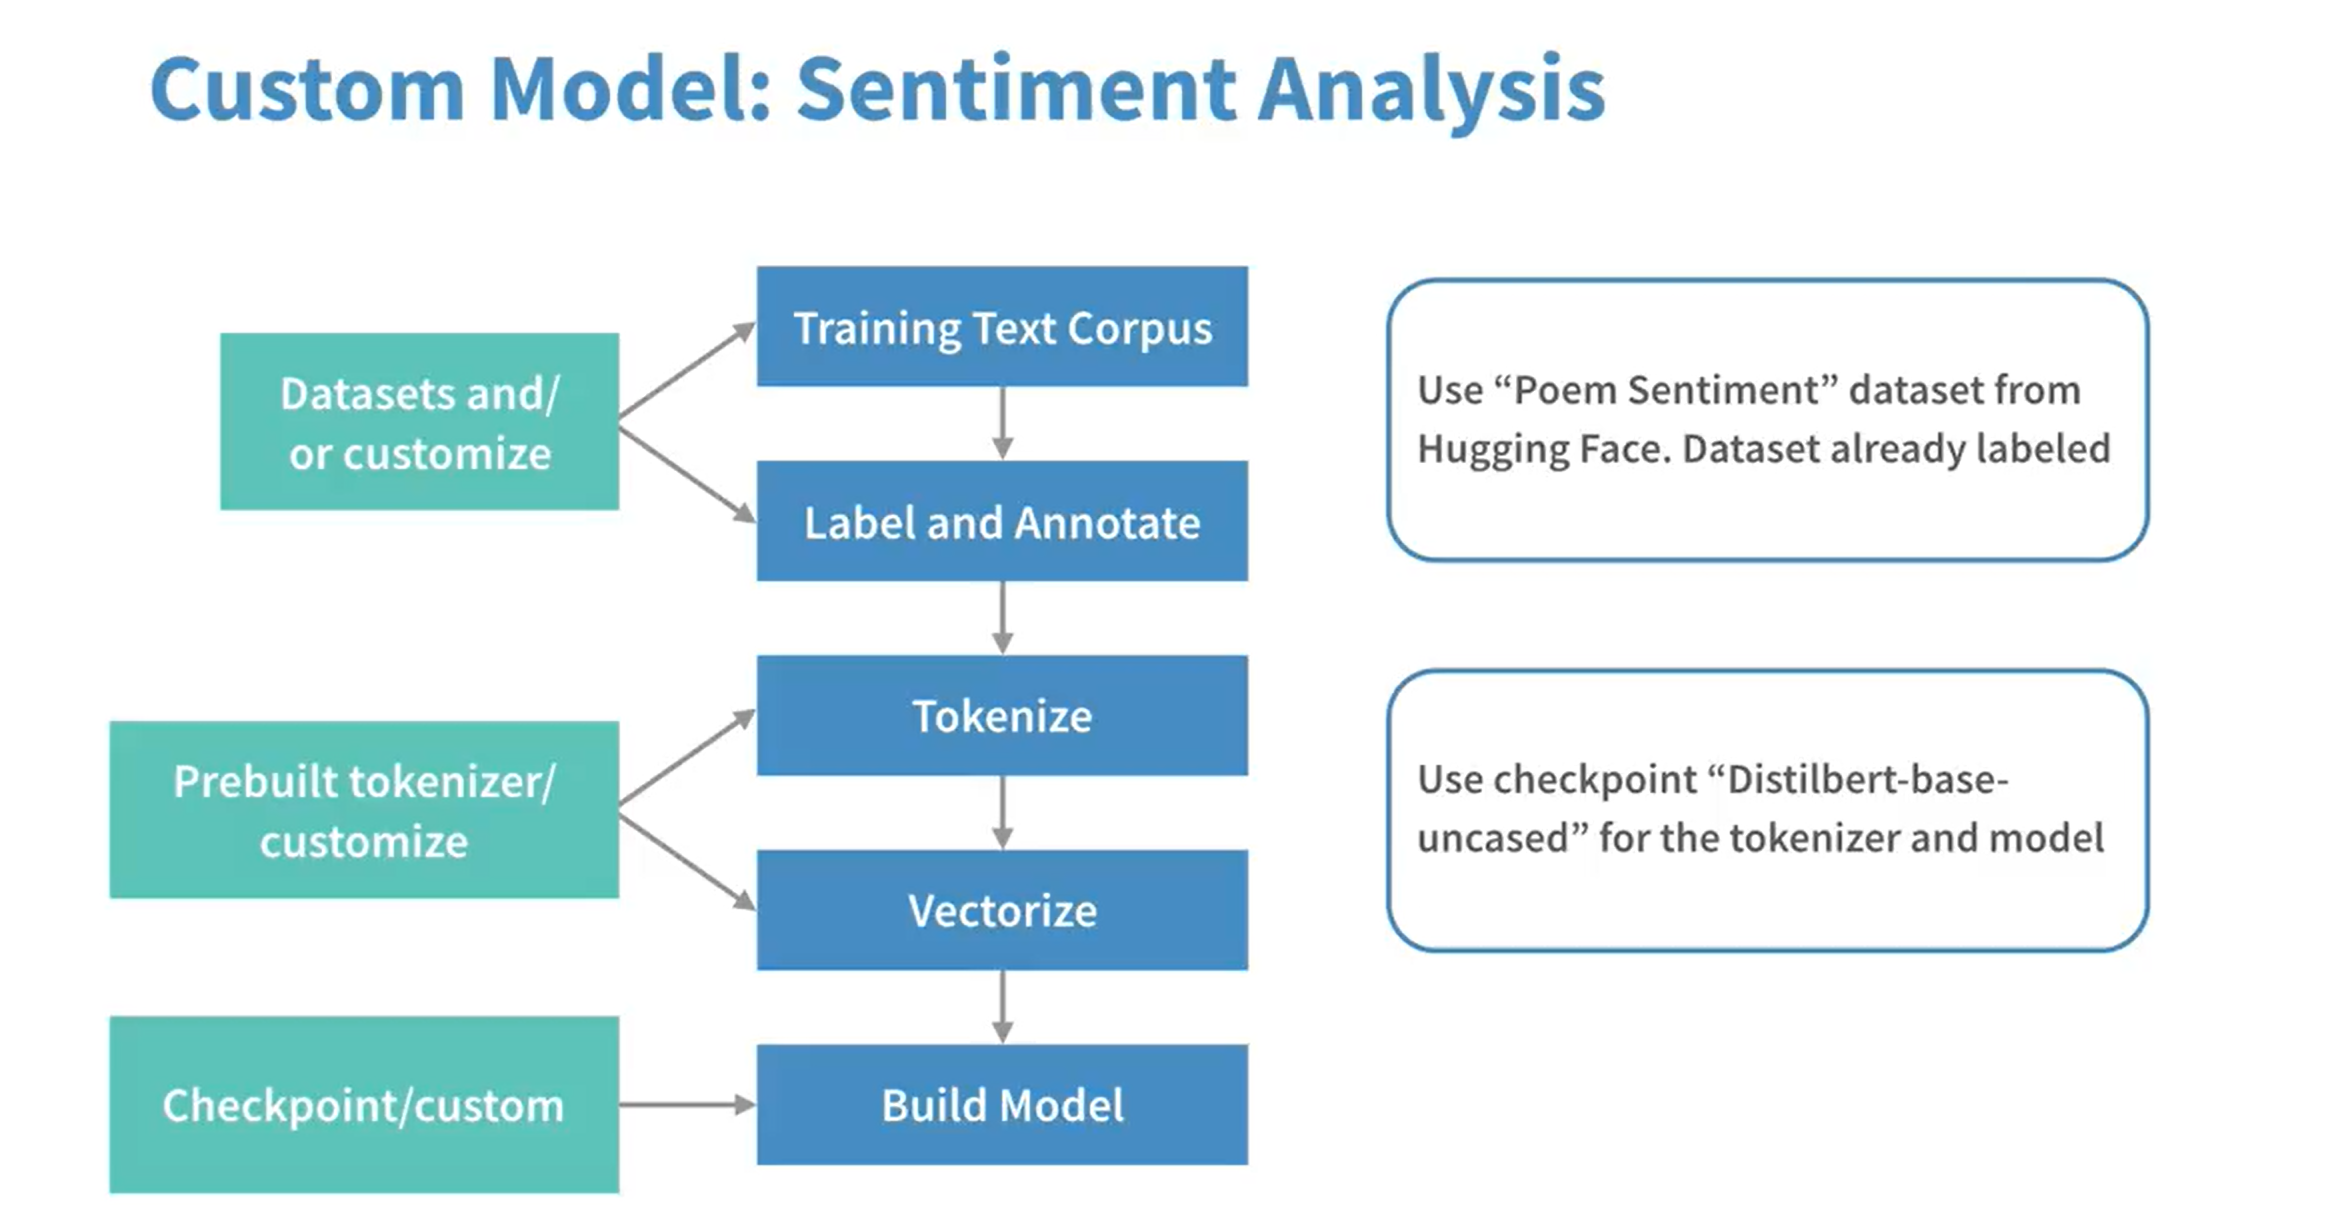



In [32]:
from datasets import load_dataset 

#Use pretrained model checkpoint from Huggingface 
model_name = "distilbert-base-uncased" 

#Use pre-labeled dataset from huggingface 
dataset_name= "poem_sentiment" 

poem_sentiments = load_dataset(dataset_name) 
#Apache Arrow format 
print(poem_sentiments) 

print(poem_sentiments["test"][20:25]) 

print("\nSentiment Labels used", 
poem_sentiments["train"].features.get("label").names)

Generating test split: 100%|██████████| 104/104 [00:00<00:00, 20870.18 examples/s]


DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})
{'id': [20, 21, 22, 23, 24], 'verse_text': ["as o'er the earth it wanders wide,", 'how hearts were answering to his own,', 'glad on its stone-built hearth; and thorough the wide-mouthed smoke-flue', 'sees the clouds reel and roll above our head,', '’tis to behold his vengeance for my son.'], 'label': [2, 1, 2, 2, 0]}

Sentiment Labels used ['negative', 'positive', 'no_impact', 'mixed']


In [34]:
#Encoding text 
from transformers import DistilBertTokenizer 
db_tokenizer = DistilBertTokenizer.from_pretrained(model_name) 

def tokenize(batch):
    return db_tokenizer(batch["verse_text"], padding=True, truncation=True) 

enc_poem_sentiment = poem_sentiments.map( tokenize, batched=True, batch_size=None) 
print(enc_poem_sentiment["train"][0:5])





Map: 100%|██████████| 104/104 [00:00<00:00, 2163.20 examples/s]

{'id': [0, 1, 2, 3, 4], 'verse_text': ['with pale blue berries. in these peaceful shades--', 'it flows so long as falls the rain,', 'and that is why, the lonesome day,', 'when i peruse the conquered fame of heroes, and the victories of mighty generals, i do not envy the generals,', 'of inward strife for truth and liberty.'], 'label': [1, 2, 0, 3, 3], 'input_ids': [[101, 2007, 5122, 2630, 22681, 1012, 1999, 2122, 9379, 13178, 1011, 1011, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2009, 6223, 2061, 2146, 2004, 4212, 1996, 4542, 1010, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1998, 2008, 2003, 2339, 1010, 1996, 10459, 14045, 2154, 1010, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2043, 1045, 7304, 3366, 1996, 11438, 4476, 1997, 7348, 1010, 1998, 1996, 9248, 1997, 10478, 11593, 1010, 1045, 2079, 2025, 21103, 1996, 11593, 1010, 102, 0, 0], [101, 1997, 20546, 27865, 2005, 3606, 1998, 7044, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# Explore input IDS  and  attention masks 


print("Text :" ,
      enc_poem_sentiment["train"][1].get("verse_text")) 

print("\nInput Map :", 
      enc_poem_sentiment["train"][1].get("input_ids")) 

print("\nAttention Mask :", 
      enc_poem_sentiment["train"][1].get("attention_mask") ) 

print("\nTotal tokens: ", 
      len(enc_poem_sentiment["train"][1].get("input_ids"))) 

print("Non Zero tokens: ", 
      len(list(filter(
          lambda x :x > 0, 
          enc_poem_sentiment["train"][1].get("input_ids")))))

print("Attention = 1: ", 
      len(list(filter(
          lambda x :x > 0, 
          enc_poem_sentiment["train"][1].get("attention_mask")))))


Text : it flows so long as falls the rain,

Input Map : [101, 2009, 6223, 2061, 2146, 2004, 4212, 1996, 4542, 1010, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Attention Mask : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Total tokens:  28
Non Zero tokens:  11
Attention = 1:  11


In [37]:
#Separate training and validation sets 
training_dataset = enc_poem_sentiment[ "train" ] 
validation_dataset=enc_poem_sentiment["validation"] 

print("\nColumn Names : ",training_dataset.column_names) 
print("\nFeatures : ",training_dataset.features) 

labels = training_dataset.features.get("label") 
num_labels=len(labels.names)


Column Names :  ['id', 'verse_text', 'label', 'input_ids', 'attention_mask']

Features :  {'id': Value(dtype='int32', id=None), 'verse_text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'], id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}


## Building a Custom model Architecture



In [38]:
from transformers import TFAutoModelForSequenceClassification 
#Load transformer checkpoint from huggingface 
sentiment_model = (TFAutoModelForSequenceClassification
                   .from_pretrained(model_name, num_labels=num_labels) ) 

sentiment_model.get_config()

model.safetensors: 100%|██████████| 268M/268M [00:20<00:00, 13.0MB/s] 


{'vocab_size': 30522,
 'max_position_embeddings': 512,
 'sinusoidal_pos_embds': False,
 'n_layers': 6,
 'n_heads': 12,
 'dim': 768,
 'hidden_dim': 3072,
 'dropout': 0.1,
 'attention_dropout': 0.1,
 'activation': 'gelu',
 'initializer_range': 0.02,
 'qa_dropout': 0.1,
 'seq_classif_dropout': 0.2,
 'return_dict': True,
 'output_hidden_states': False,
 'output_attentions': False,
 'torchscript': False,
 'torch_dtype': None,
 'use_bfloat16': False,
 'tf_legacy_loss': False,
 'pruned_heads': {},
 'tie_word_embeddings': True,
 'chunk_size_feed_forward': 0,
 'is_encoder_decoder': False,
 'is_decoder': False,
 'cross_attention_hidden_size': None,
 'add_cross_attention': False,
 'tie_encoder_decoder': False,
 'max_length': 20,
 'min_length': 0,
 'do_sample': False,
 'early_stopping': False,
 'num_beams': 1,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'typical_p': 1.0,
 'repetition_penalty': 1.0,
 'length_penalty': 1.0,
 'no_repeat_ngram_s

In [41]:
#Freeze the first layer if needed 
sentiment_model.layers[0].trainable = True 

#Add/remove layers if needed. 
#sentiment_model.layers [append()/insert()/remove() ] 

print(sentiment_model.summary())

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66,956,548
Trainable params: 66,956,548
Non-trainable params: 0
_________________________________________________________________
None


## Training the sentiment model with custom dataset



In [44]:
#Using features from a pretrained model 
import tensorflow as tf 

batch_size=64 
tokenizer_columns = db_tokenizer.model_input_names 

# Convert to TF tensors 

train_dataset = training_dataset.to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True, batch_size=batch_size) 

val_dataset = validation_dataset.to_tf_dataset( columns=tokenizer_columns, label_cols=["label"], shuffle=False, batch_size=batch_size) 

sentiment_model.compile( 
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=tf.metrics.SparseCategoricalAccuracy()) 

sentiment_model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=5)

Epoch 1/5
14/14 [==============================] - 87s 5s/step - loss: 1.1290 - sparse_categorical_accuracy: 0.5919 - val_loss: 0.9167 - val_sparse_categorical_accuracy: 0.6571
Epoch 2/5
14/14 [==============================] - 59s 4s/step - loss: 0.9472 - sparse_categorical_accuracy: 0.6390 - val_loss: 0.7401 - val_sparse_categorical_accuracy: 0.7333
Epoch 3/5
14/14 [==============================] - 67s 5s/step - loss: 0.6209 - sparse_categorical_accuracy: 0.8016 - val_loss: 0.5636 - val_sparse_categorical_accuracy: 0.8476
Epoch 4/5
14/14 [==============================] - 58s 4s/step - loss: 0.3137 - sparse_categorical_accuracy: 0.9036 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.8476
Epoch 5/5
14/14 [==============================] - 55s 4s/step - loss: 0.1819 - sparse_categorical_accuracy: 0.9451 - val_loss: 0.8668 - val_sparse_categorical_accuracy: 0.7429


In [50]:
from datasets import Dataset, DatasetDict

#Input data for interference to predict sentiment 
# the "label" array is not needed for inference, but added to provide true 
infer_data = {'id':[0,1], 
              'verse_text':['and be glad in the summer morning when the kind', 
                            'how hearts were answering to his own'], 
              'label':[1,0]} 
infer_dataset = Dataset.from_dict(infer_data) 

ds_dict=DatasetDict() 
ds_dict["infer"] = infer_dataset 

print(ds_dict) 


#Encode the dataset, similar to training 
enc_dataset=ds_dict.map(tokenize, batched=True, batch_size=None) 

#Convert to Tensors 
infer_final_dataset = enc_dataset["infer"].to_tf_dataset( 
    columns=tokenizer_columns, shuffle=True, 
    batch_size=batch_size) 

print(infer_final_dataset) 

#Predict with the model 
predictions=sentiment_model.predict(infer_final_dataset) 



DatasetDict({
    infer: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 2
    })
})


Map: 100%|██████████| 2/2 [00:00<00:00, 319.91 examples/s]


<PrefetchDataset element_spec={'input_ids': TensorSpec(shape=(None, 12), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 12), dtype=tf.int64, name=None)}>
1/1 [==============================] - 1s 1s/step


In [51]:
predictions.logits

array([[-1.5395851 ,  2.2730758 , -1.8047061 ,  0.04826963],
       [-1.7074888 ,  2.8890395 , -1.5858705 , -0.64837927]],
      dtype=float32)

In [54]:
import numpy as np 
pred_label_ids=np.argmax(predictions.logits, axis=1) 

for i in range(len(pred_label_ids)): 
    print("Poem =", infer_data["verse_text"][i], 
    " Predicted=",labels.names[pred_label_ids[i]], 
    " True-Label=",labels.names[infer_data["label"][i]])

Poem = and be glad in the summer morning when the kind  Predicted= positive  True-Label= positive
Poem = how hearts were answering to his own  Predicted= positive  True-Label= negative


## Inference challenges with Transformers

>  Use case specific performance

>  memory requirements

>  compute resource requirements  : gpus

>  latency. infra must be able to do parallel processing

>  cost per inference



## Customizing the pretrained model 
  when to customise - low performance for use case specific samples.
  model size are huge.
 variations in content structure or grammar.
 custom / special vocabulary.



## Transfer Learning with Custom Datasets

Small dataset sizes

HQ Datasets

Iterative model arch. evolution

Thorough validation and testing

Model monitoring for drift and bias

constant model training with new data


##### Model compression 

what to reduce in compression?  > numbe of layers, nodes, parameters
storage needs

##### Benefits of Compression
    Lower number of math operations
    LOWER MEMORY FOOTPRINT
    Less compute power


##### Techniques:

Quantization
Pruning
Low Rank Approximation
Knowledge Distillation
Neural Arch. Search





In [ ]:


Chained model
Single input independent models
alternate models
